<a href="https://colab.research.google.com/github/11bunny/Bunny-projects-and-labs/blob/main/FMML_2022_Module_04_Project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### Project for Module: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

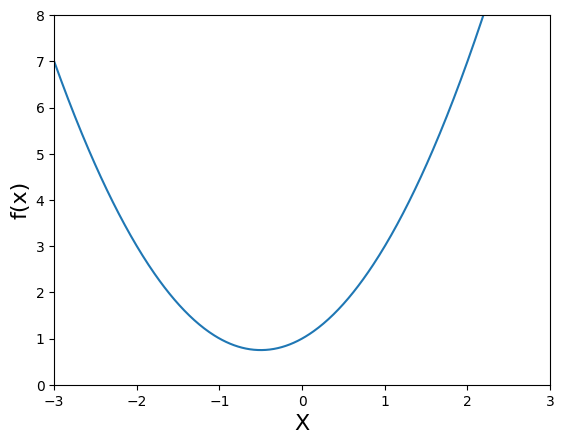

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2 * x + 1

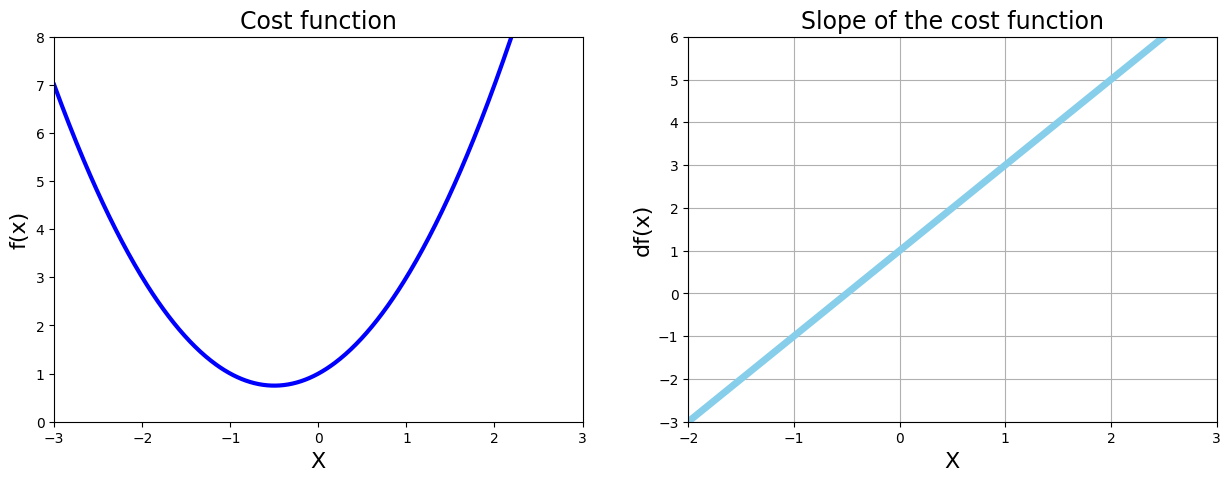

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [8]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # Gradient computation
    new_x = previous_x - step_multiplier * gradient  # Update using gradient descent

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


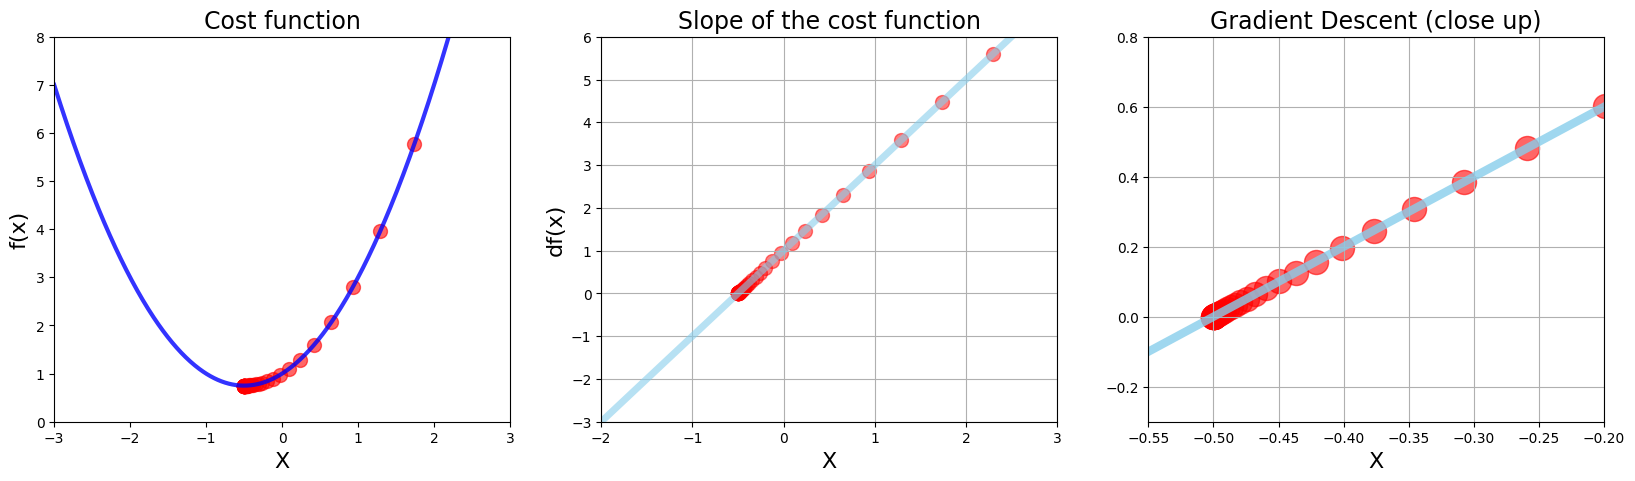

In [9]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return  ## [REQUIRED]

def dg(x):
    return ## [REQUIRED]

In [11]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

## Gradient Descent

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [17]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter=10000):
    new_x = initial_guess
    step_size = 1
    x_list = [new_x]
    deriv_list = []
    for _ in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)

        # Check if gradient is None
        if gradient is None:
            break

        new_x = previous_x - multiplier * gradient
        x_list.append(new_x)
        deriv_list.append(gradient)

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break

    return new_x, x_list, deriv_list

# Usage example
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: 0.5
Number of steps: 1


In [18]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.5
Number of steps: 1


In [21]:
local_min, list_x, deriv_list = gradient_descent(dg, initial_guess=-0.1, multiplier=0.02, precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: -0.1
Number of steps: 1


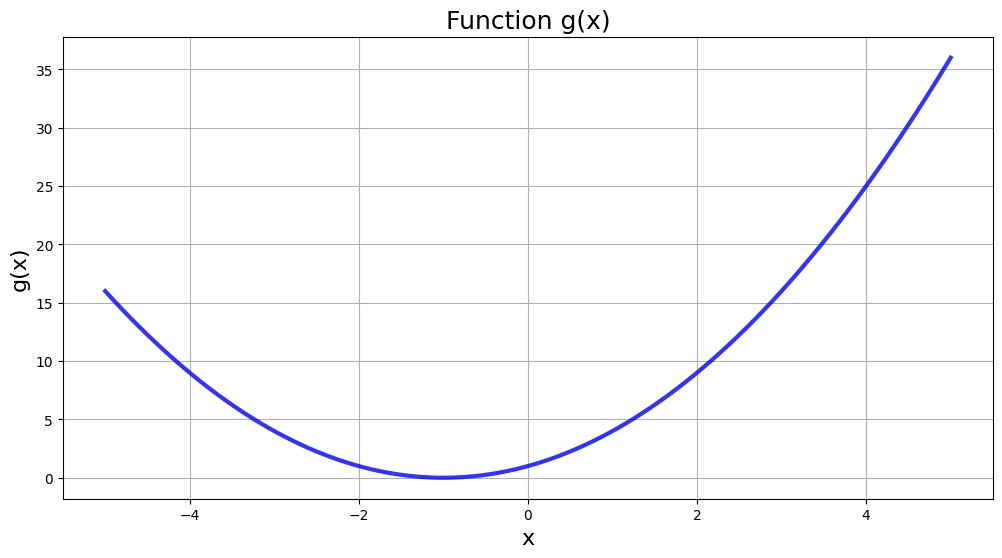

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define your function g(x)
def g(x):
    return x**2 + 2*x + 1

# Define the range of x values for plotting
x_2 = np.linspace(-5, 5, 100)

# Plotting
plt.figure(figsize=(12, 6))

# Plot function
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# Plotting details
plt.title('Function g(x)', fontsize=18)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.grid(True)
plt.show()


# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

In [25]:
## TASK-4 : Code the same things as they were done for the first two examples

# The Learning Rate

In [27]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier=0.02, precision=0.001, max_iter=500)


In [30]:
## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)


mid_gamma = None  # [REQUIRED]

mid_gamma = None  # [REQUIRED]


# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)

In [31]:
## TASK-7 : Plot reduction in cost for each iteration

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [32]:
## TASK-8 : Code the same things as they were done for the first two examples


In [33]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


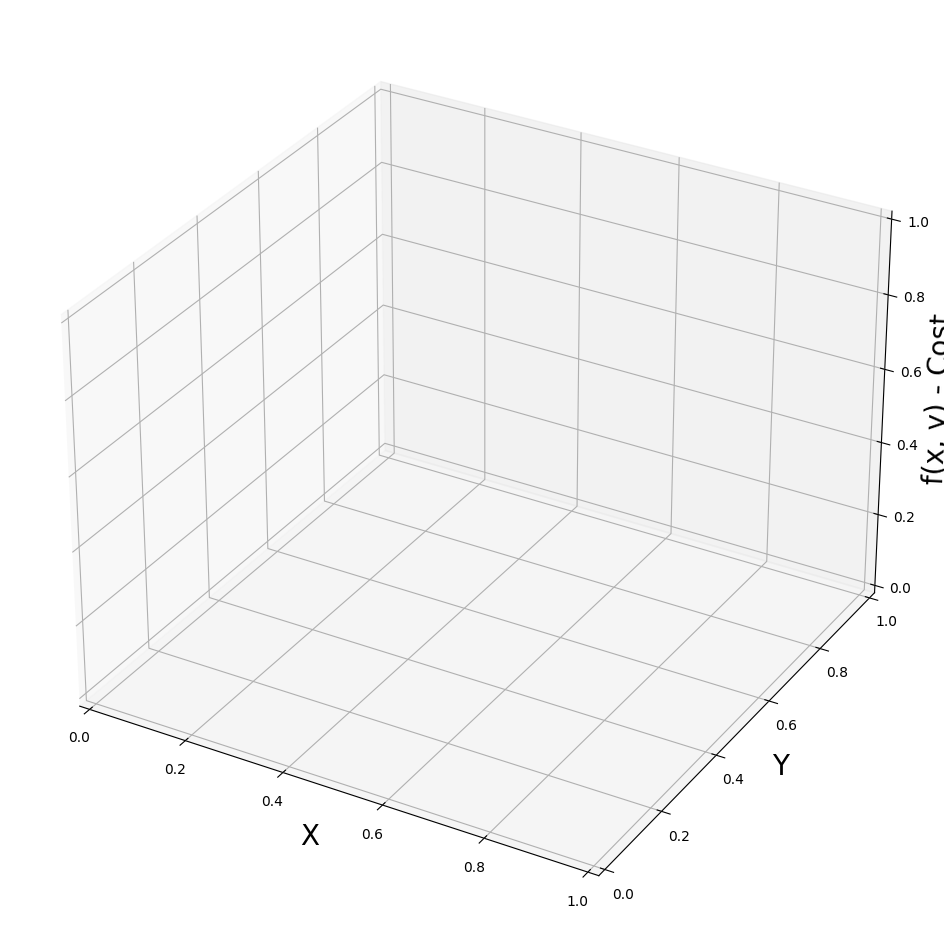

In [35]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

def f(x, y):
    # Define the function here
    return x**2 + y**2  # Example function, replace with your actual function


plt.show()

##########################
##########################

## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

##########################
##########################

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = ## [REQUIRED]

## $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [36]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  x**2 + y**2
Partial derivative wrt x is:  2*y
Value of f(x,y) at x=1.8 y=1.0 is:  4.24000000000000
Value of partial derivative wrt x:  3.60000000000000


## Batch Gradient Descent with SymPy

In [37]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979496953e-48 8.76866552760853e-49]
Minimum occurs at x value of:  6.31343917987813e-49
Minimum occurs at y value of:  3.50746621104341e-49
The cost is:  5.21618334996315e-97


In [38]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

In [44]:
import numpy as np

# Define your gradient descent function
def gradient_descent(params, multiplier, max_iter):
    # Gradient descent algorithm implementation here
    pass

# Define your initial values for x and y
initial_x = 0.0  # Replace 0.0 with your desired initial value for x
initial_y = 0.0  # Replace 0.0 with your desired initial value for y

# Define initial parameters
initial_params = np.array([initial_x, initial_y])

# Call gradient_descent function with initial parameters
gradient_descent(initial_params, multiplier=0.1, max_iter=100)






## Graphing 3D Gradient Descent

In [46]:
import numpy as np

# Example implementation of f(x, y)
def f(x, y):
    return x**2 + y**2

# Example implementation of the partial derivative of f with respect to x
def fpx(x, y):
    return 2 * x

# Example implementation of the partial derivative of f with respect to y
def fpy(x, y):
    return 2 * y

# Initial guess for the parameters
params = np.array([3, 4])

# Multiplier for the update step
multiplier = 0.1

# Number of iterations
num_iterations = 10

# Array to store parameter values
values_array = params.reshape(1, 2)

# Gradient descent loop
for _ in range(num_iterations):
    # Compute gradients
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])

    if gradient_x is None or gradient_y is None:
        print("Error: Gradient calculation returned None")
        break

    gradients = np.array([gradient_x, gradient_y])

    # Update parameters
    params = params - multiplier * gradients

    # Append updated parameters to the array
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

print("Optimized parameters:", params)
print("Function value at optimized parameters:", f(params[0], params[1]))
print("Parameter values over iterations:")
print(values_array)


Optimized parameters: [0.32212255 0.42949673]
Function value at optimized parameters: 0.2882303761517119
Parameter values over iterations:
[[3.         4.        ]
 [2.4        3.2       ]
 [1.92       2.56      ]
 [1.536      2.048     ]
 [1.2288     1.6384    ]
 [0.98304    1.31072   ]
 [0.786432   1.048576  ]
 [0.6291456  0.8388608 ]
 [0.50331648 0.67108864]
 [0.40265318 0.53687091]
 [0.32212255 0.42949673]]


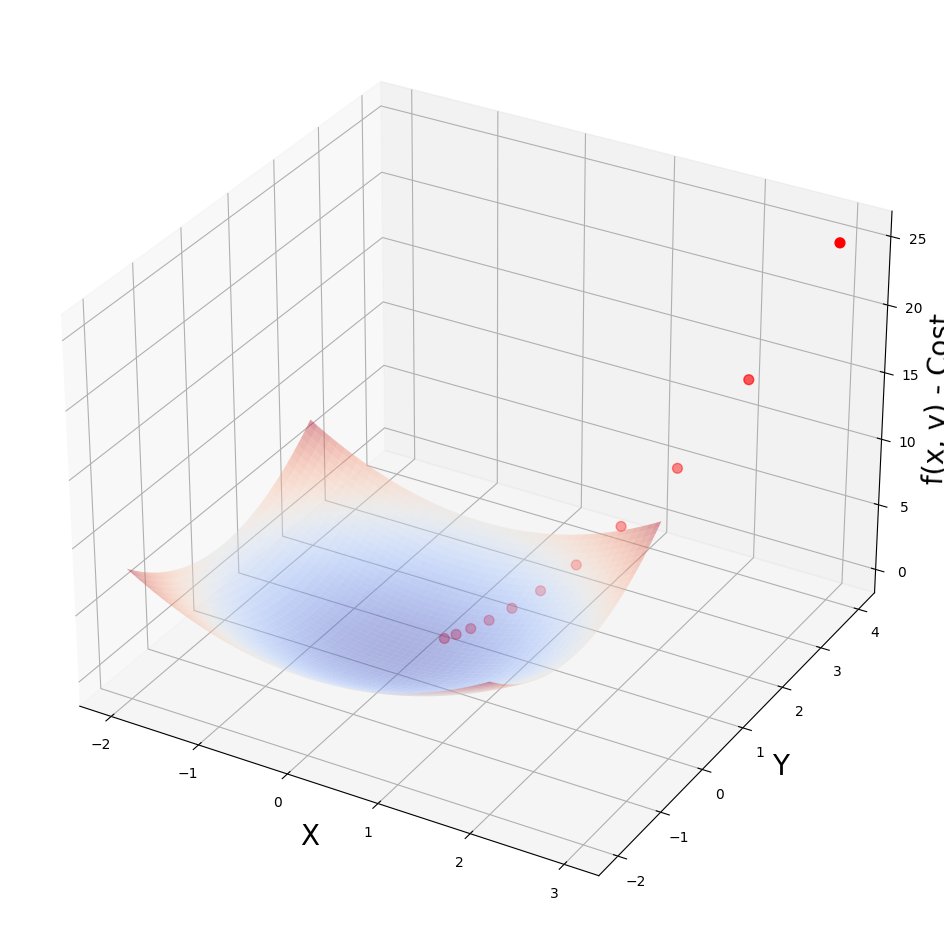

In [47]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [49]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [50]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


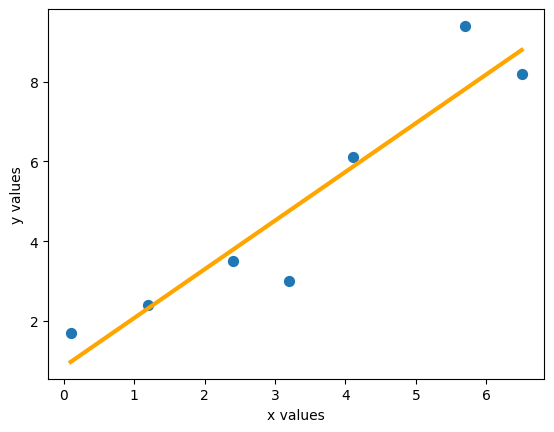

In [51]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [52]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [53]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [54]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [55]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [56]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-56-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


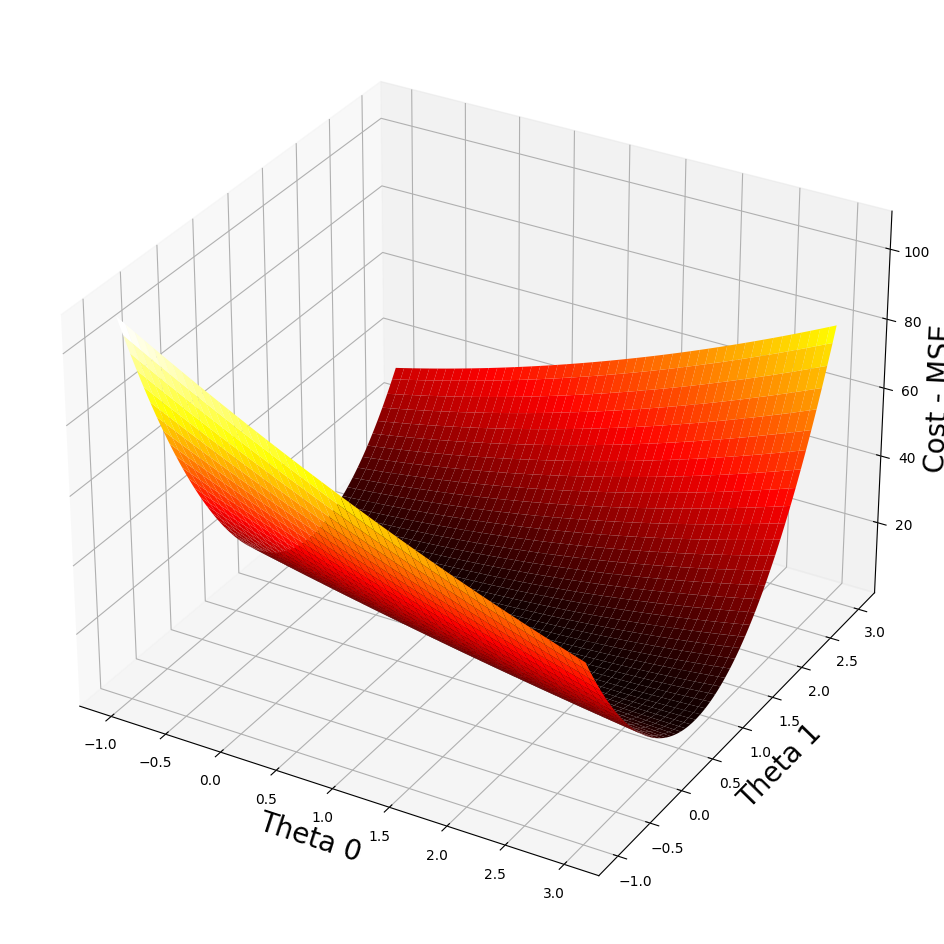

In [57]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [58]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [59]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [60]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


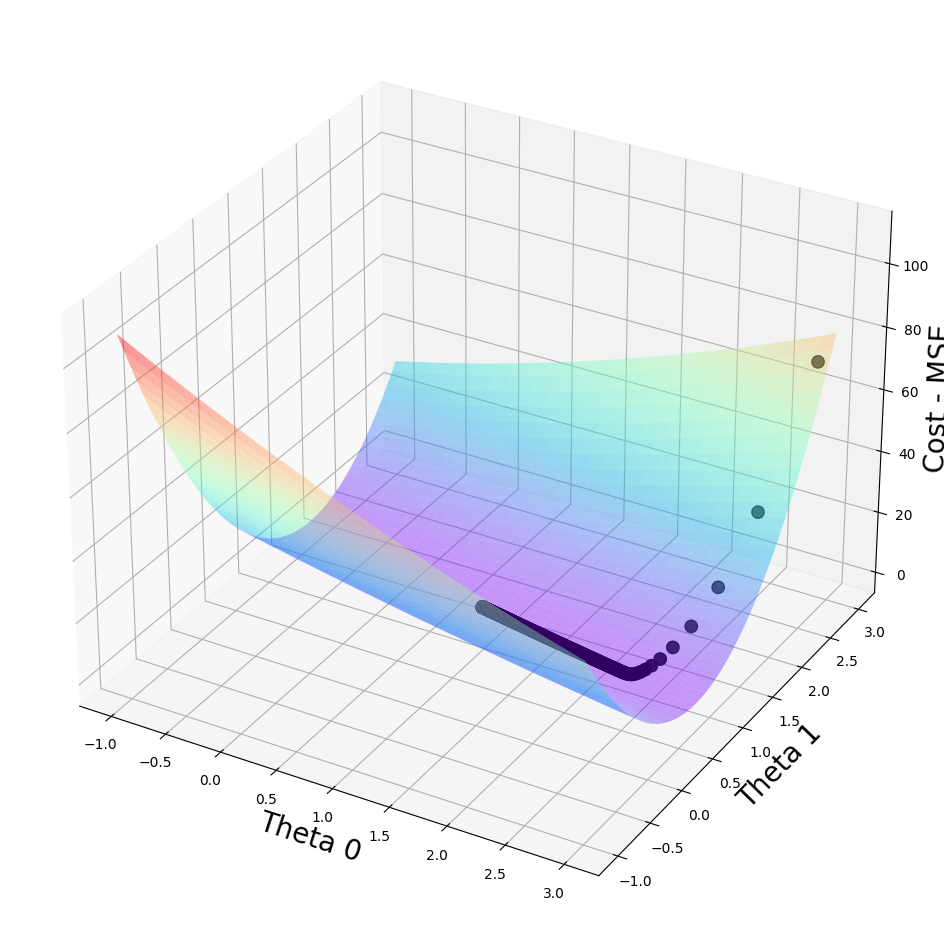

In [61]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()